In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Kristen Gilbert

### Construct table of the data

In [2]:
Gilbert_present = np.append(
    np.repeat('Yes', 257), 
    np.repeat('No', 1384)
)

Gilbert_present

array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No'],
      dtype='<U3')

In [3]:
Deaths = np.append(
    np.append(np.repeat(1, 40), np.repeat(0, 217)),
    np.append(np.repeat(1, 34), np.repeat(0, 1350))
)

Deaths   

array([1, 1, 1, ..., 0, 0, 0])

In [4]:
Gilbert = Table().with_columns(
    'Gilbert present', Gilbert_present,
    'Deaths', Deaths
)

Gilbert

Gilbert present,Deaths
Yes,1
Yes,1
Yes,1
Yes,1
Yes,1
Yes,1
Yes,1
Yes,1
Yes,1
Yes,1


### Determine observed difference

In [5]:
Gilbert_summary = Gilbert.group('Gilbert present', np.mean)
Gilbert_summary

Gilbert present,Deaths mean
No,0.0245665
Yes,0.155642


In [6]:
obs_diff_prop = Gilbert_summary.column(1).item(0) - Gilbert_summary.column(1).item(1)
obs_diff_prop

-0.1310755493578642

In [7]:
def difference_of_props(table, group_label, outcome):
    """Takes: name of table, column label of binary categorical variable,
    column label of group-label variable
    Returns: Difference of proportions of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(outcome, group_label)  
    
    # table containing counts for each group
    summary_table = reduced.group(group_label, np.mean)
    
    return summary_table.column(1).item(0) - summary_table.column(1).item(1)

In [8]:
difference_of_props(Gilbert, 'Gilbert present', 'Deaths')

-0.1310755493578642

### Simulate one outcome

In [9]:
shuffled_labels = Gilbert.sample(with_replacement=False).column('Gilbert present')
shuffled_labels

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      dtype='<U3')

In [10]:
original_and_shuffled = Gilbert.with_column(
    'Shuffled Label', shuffled_labels
)

original_and_shuffled

Gilbert present,Deaths,Shuffled Label
Yes,1,No
Yes,1,No
Yes,1,No
Yes,1,No
Yes,1,No
Yes,1,No
Yes,1,No
Yes,1,Yes
Yes,1,No
Yes,1,No


In [11]:
difference_of_props(original_and_shuffled, 'Shuffled Label', 'Deaths')

0.002718674793639367

In [12]:
def one_simulated_difference(table, group_label, outcome):
    """Takes: name of table, column label of binary cateogorcial variable,
    column label of group-label variable
    Returns: Difference of proportions of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of outcome variable and shuffled labels
    shuffled_table = table.select(outcome).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_props(shuffled_table, 'Shuffled Label', outcome)  

In [13]:
one_simulated_difference(Gilbert, 'Gilbert present', 'Deaths')

-0.00650851307887812

### Simulate many outcomes

In [14]:
differences = make_array()

for i in np.arange(1000):
    new_difference = one_simulated_difference(Gilbert, 'Gilbert present', 'Deaths')
    differences = np.append(differences, new_difference)

### Use simulation to make a decision

Observed Difference: -0.1310755493578642


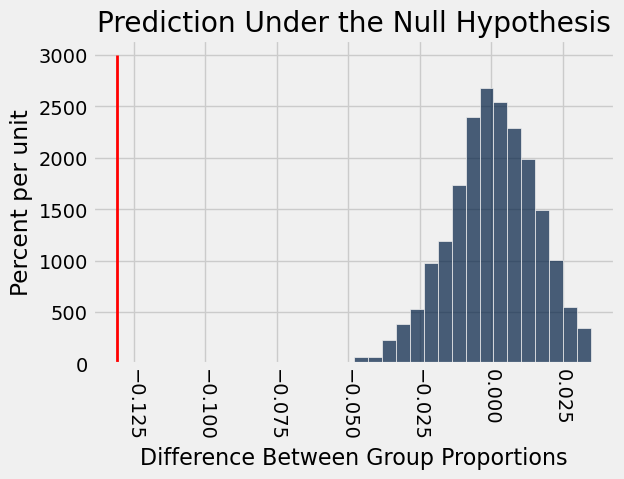

In [15]:
Table().with_column('Difference Between Group Proportions', differences).hist(bins=17)
print('Observed Difference:', obs_diff_prop)
plots.title('Prediction Under the Null Hypothesis');
plots.plot([obs_diff_prop, obs_diff_prop], [0, 30], color='red', lw=2);
plots.xticks(rotation = 270);

In [16]:
p_value = sum(differences<= obs_diff_prop)/1000
p_value

0.0